In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
df=pd.read_excel("/home/pogo/Desktop/Ba/Desktop/Books/Capstone/Phase 2/Parallel/Data/CALCULATIONS/MMYT_Jan.xlsx")
df=df.dropna()
pos=df[df['Date'].str.contains("Jan")]
pos

,Unnamed: 0,Date,Media,Title,Summary,Title_Refined,Sentiment Score,Class Label
0,0,01-Jan-2021,The Economic Times,Consolidation and shakeouts: Aviation to get r...,Consolidation and shakeouts: Aviation to get r...,consolidation and shakeouts: aviation to get r...,0.000000,0
1,1,01-Jan-2021,Goodreturns,Tax Refund Scheme Benefits Extended To All Exp...,Tax Refund Scheme Benefits Extended To All Exp...,tax refund scheme benefits extended to all exp...,0.000000,0
2,2,01-Jan-2021,Goodreturns,How Your Credit Card Is Going To Be More Benef...,How Your Credit Card Is Going To Be More Benef...,how your credit card is going to be more benef...,0.500000,1
3,3,02-Jan-2021,Goodreturns,LPG Cylinder Booking: Govt Launches New Missed...,LPG Cylinder Booking: Govt Launches New Missed...,lpg cylinder booking: govt launches new missed...,0.136364,1
4,4,02-Jan-2021,Goodreturns,How To Make Online Appointment For Aadhaar Sev...,How To Make Online Appointment For Aadhaar Sev...,how to make online appointment for aadhaar sev...,0.000000,0
...,...,...,...,...,...,...,...,...
179,189,30-Jan-2021,Travel Trends Today,SOTC announces physical roadshows,Indians are displaying a strong appetite for h...,sotc announces physical roadshows,0.000000,0
180,190,30-Jan-2021,Goodreturns,PM Modi To Lead An All-Party Meeting To Presen...,PM Modi To Lead An All-Party Meeting To Presen...,pm modi to lead an all-party meeting to presen...,0.000000,0
181,191,30-Jan-2021,Goodreturns,India's April-Dec Fiscal Deficit Reaches 145% ...,India's April-Dec Fiscal Deficit Reaches 145% ...,india's april-dec fiscal deficit reaches 145% ...,0.350000,1
182,192,30-Jan-2021,The Economic Times,"Happy about jabs, worried about jobs: India's ...","In a highly informal economy, where unorganise...","happy about jabs, worried about jobs: india's ...",0.800000,1


In [94]:
pos1=pos[['Date','Class Label']]
#pos1['Date']=pd.to_datetime(pos1['Date'])
#chart=pos['Class Label'].value_counts().reset_index().rename(columns={"Class Label":"Count","index":"Class Label"})

In [95]:
ex=pos1.fillna('').groupby('Date').agg(lambda x:sum(list(x))).reset_index()
final=[]
for i in ex['Class Label'].tolist():
    if i>0:
        final.append(1)
    elif i==0:
        final.append(0)
    else:
        final.append(-1)
ex['Final Class Label']=final
ex

,Date,Class Label,Final Class Label
0,01-Jan-2021,1,1
1,02-Jan-2021,1,1
2,04-Jan-2021,0,0
3,05-Jan-2021,3,1
4,06-Jan-2021,2,1
5,07-Jan-2021,-1,-1
6,08-Jan-2021,1,1
7,09-Jan-2021,-4,-1
8,10-Jan-2021,1,1
9,11-Jan-2021,3,1


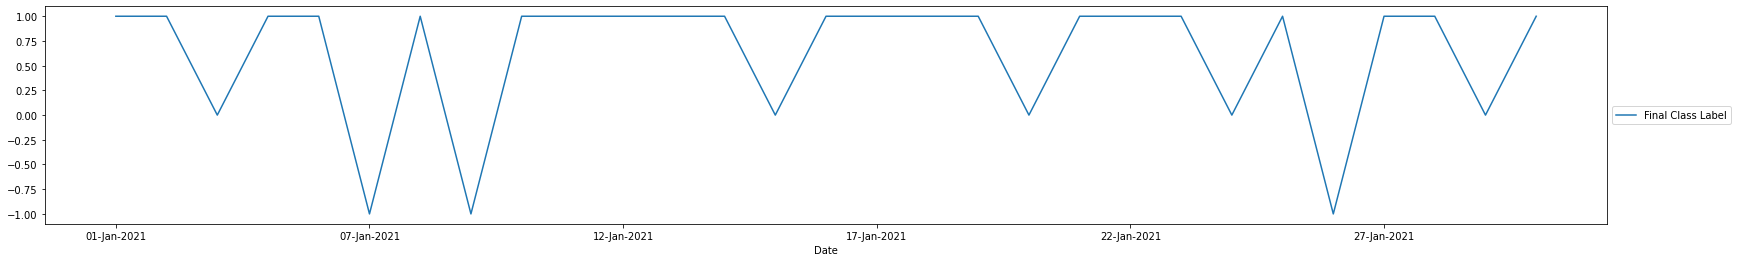

In [96]:
import seaborn as sns

c1=ex[['Date','Final Class Label']]
#pos1['Date'] = pd.DatetimeIndex(pos1.Date)
c1 = c1.set_index('Date')

fig, ax = plt.subplots(figsize=(14,4))
c1.plot(ax=ax)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))